In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [103]:
X = [i for i in range(-20,20)]
y = [3*x for x in X]

In [104]:
y_points = list(map(lambda x: x+random.random()*5 * (-1 if random.random()>0.5 else 1), y))

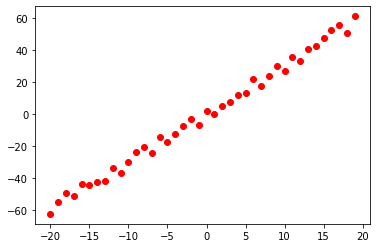

In [105]:
#plt.plot(X,y)
plt.plot(X, y_points, 'ro')

In [106]:
point_tuples = list(zip(X,y_points))
print(point_tuples)
dims = 2

[(-20, -62.15085162599303), (-19, -54.51403747498398), (-18, -49.000021187095726), (-17, -51.18670163727176), (-16, -43.42391997068769), (-15, -44.259170430663545), (-14, -42.488156944786894), (-13, -41.47193523228339), (-12, -33.257317477299075), (-11, -36.732724022136196), (-10, -30.020179548722403), (-9, -23.23697931732584), (-8, -20.073946884767018), (-7, -24.3647932746398), (-6, -14.206686912455336), (-5, -17.41705585983766), (-4, -12.325088003585503), (-3, -6.986957857072399), (-2, -3.175149915941123), (-1, -6.660403390148619), (0, 1.9768514768874028), (1, 0.2563683975417579), (2, 5.2619427683375255), (3, 7.652441295459932), (4, 12.283475371224782), (5, 13.428432592610914), (6, 22.147629960918504), (7, 17.675419383133825), (8, 23.646729424230706), (9, 30.303070983228338), (10, 27.341282067820913), (11, 35.95610103311485), (12, 33.5855128380639), (13, 41.01248039149766), (14, 42.70484666919732), (15, 47.57152139614551), (16, 52.91956116144942), (17, 55.83972052551522), (18, 51.043

In [107]:
def get_covariance_matrix(points):
    eX = list()
    for pt in points:
        eX.append(pt)
    print(eX)
    #print(points)
    M = np.zeros((dims))

    for x in eX:
        M += x

    M /= len(eX)
    print(M)
    for i in range(len(eX)):
        eX[i] = eX[i] - M
    
    dim = dict()
    for i in range(dims):
        dim[i] = np.zeros((len(eX)))
        for j in range(len(eX)):
            dim[i][j] = eX[j][i]
    def covariance(i, j):
        temp_array = dim[i] * dim[j]    
        k = np.sum(temp_array)/len(eX)
        #print(k, temp_array)
        return k
    K = np.zeros((dims, dims))

    for i in range(dims):    
        for j in range(dims):
            K[i][j] = covariance(i, j)
    
    eigenvalues, eigenvectors = np.linalg.eig(K)
    
    return K, eigenvalues, eigenvectors

In [108]:
cov_matrix, eigenvalues, eigenvectors = get_covariance_matrix(point_tuples)

[(-20, -62.15085162599303), (-19, -54.51403747498398), (-18, -49.000021187095726), (-17, -51.18670163727176), (-16, -43.42391997068769), (-15, -44.259170430663545), (-14, -42.488156944786894), (-13, -41.47193523228339), (-12, -33.257317477299075), (-11, -36.732724022136196), (-10, -30.020179548722403), (-9, -23.23697931732584), (-8, -20.073946884767018), (-7, -24.3647932746398), (-6, -14.206686912455336), (-5, -17.41705585983766), (-4, -12.325088003585503), (-3, -6.986957857072399), (-2, -3.175149915941123), (-1, -6.660403390148619), (0, 1.9768514768874028), (1, 0.2563683975417579), (2, 5.2619427683375255), (3, 7.652441295459932), (4, 12.283475371224782), (5, 13.428432592610914), (6, 22.147629960918504), (7, 17.675419383133825), (8, 23.646729424230706), (9, 30.303070983228338), (10, 27.341282067820913), (11, 35.95610103311485), (12, 33.5855128380639), (13, 41.01248039149766), (14, 42.70484666919732), (15, 47.57152139614551), (16, 52.91956116144942), (17, 55.83972052551522), (18, 51.043

In [109]:
cov_matrix

array([[ 133.25      ,  401.74458126],
       [ 401.74458126, 1219.1307549 ]])

In [110]:
eigenvalues

array([7.77198695e-01, 1.35160356e+03])

In [111]:
eigenvectors = eigenvectors.T

In [112]:
eigenvectors

array([[-0.94970102,  0.31315806],
       [-0.31315806, -0.94970102]])

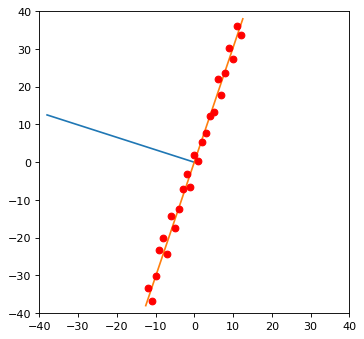

In [115]:
#plt.plot(X,y)
plt.figure(figsize=(5,5), dpi=80)
plt.ylim(ymin = -40, ymax = 40)
plt.xlim(xmin= -40, xmax = 40)
plt.plot([0, eigenvectors[0][0]*40],[0, eigenvectors[0][1]*40])
plt.plot([-eigenvectors[1][0]*40, eigenvectors[1][0]*40],[-eigenvectors[1][1]*40, eigenvectors[1][1]*40])
plt.plot(X, y_points, 'ro')

In [114]:
np.dot(eigenvectors[0], eigenvectors[1])

-1.0057391610830634e-17